In [1]:
import numpy as np

def load_data():
    """
    Generate x and y values
    """
    raw = np.stack(
        np.meshgrid(range(0, 100), ["+", "-"], range(0, 100)), axis=-1
    ).reshape(-1, 3)

    # Generate x from raw data
    x = np.full((len(raw), 5), 12)
    y = np.full((len(raw), 4), 12)

    for sample in range(len(raw)):
        # Encoding raw input onto x
        k = 0
        for i in raw[sample]:
            for j in i:
                if j == "+":
                    x[sample, k] = 10
                elif j == "-":
                    x[sample, k] = 11
                else:
                    x[sample, k] = j
                k = k + 1

        # Calculate raw input and encoding output onto y
        equation = raw[sample][0] + raw[sample][1] + raw[sample][2]
        result = eval(equation)
        k = 0
        if result >= 0:
            result = "+" + str(result)
        for i in str(result):
            if i == "+":
                y[sample, k] = 10
            elif i == "-":
                y[sample, k] = 11
            else:
                y[sample, k] = i
            k = k + 1
    return x, y


In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np


x, y = load_data()
reversed_x, reversed_y = np.flip(x, axis=1), np.flip(y, axis=1)

one_hot_x = to_categorical(x, num_classes=13)
one_hot_y = to_categorical(y, num_classes=13)
one_hot_reversed_x = to_categorical(reversed_x, num_classes=13)
one_hot_reversed_y = to_categorical(reversed_y, num_classes=13)

x_train, x_test, y_train, y_test = train_test_split(
    one_hot_x, one_hot_y, train_size=0.7
)
reversed_x_train, reversed_x_test, reversed_y_train, reversed_y_test = train_test_split(
    one_hot_reversed_x, one_hot_reversed_y, train_size=0.7
)

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def build_model():
    model = Sequential()
    model.add(LSTM(16, input_shape=(5, 13), return_sequences=False))
    model.add(RepeatVector(4))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dense(13, activation="softmax"))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [4]:
normal_model = build_model()

normal_result = normal_model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=500,
    batch_size=32
)

normal_eval_result = normal_model.evaluate(x_test,y_test)
print("Loss: %.5f \nAccuracy: %.5f" % (normal_eval_result[0], normal_eval_result [1]))

Train on 14000 samples, validate on 6000 samples
Epoch 1/500
14000/14000 [==============================] - 6s 446us/sample - loss: 1.9194 - accuracy: 0.4011 - val_loss: 1.4758 - val_accuracy: 0.5042
Epoch 2/500
14000/14000 [==============================] - 3s 181us/sample - loss: 1.4195 - accuracy: 0.5025 - val_loss: 1.3740 - val_accuracy: 0.5040
Epoch 3/500
14000/14000 [==============================] - 2s 177us/sample - loss: 1.3443 - accuracy: 0.5036 - val_loss: 1.3211 - val_accuracy: 0.5055
Epoch 4/500
14000/14000 [==============================] - 2s 174us/sample - loss: 1.3052 - accuracy: 0.5099 - val_loss: 1.2850 - val_accuracy: 0.5125
Epoch 5/500
14000/14000 [==============================] - 2s 173us/sample - loss: 1.2696 - accuracy: 0.5271 - val_loss: 1.2464 - val_accuracy: 0.5347
Epoch 6/500
14000/14000 [==============================] - 2s 175us/sample - loss: 1.2349 - accuracy: 0.5382 - val_loss: 1.2231 - val_accuracy: 0.5394
Epoch 7/500
14000/14000 [====================

14000/14000 [==============================] - 3s 189us/sample - loss: 0.7417 - accuracy: 0.7469 - val_loss: 0.7403 - val_accuracy: 0.7453
Epoch 55/500
14000/14000 [==============================] - 3s 180us/sample - loss: 0.7369 - accuracy: 0.7478 - val_loss: 0.7453 - val_accuracy: 0.7412
Epoch 56/500
14000/14000 [==============================] - 2s 172us/sample - loss: 0.7321 - accuracy: 0.7492 - val_loss: 0.7384 - val_accuracy: 0.7445
Epoch 57/500
14000/14000 [==============================] - 2s 170us/sample - loss: 0.7325 - accuracy: 0.7492 - val_loss: 0.7314 - val_accuracy: 0.7444
Epoch 58/500
14000/14000 [==============================] - 2s 172us/sample - loss: 0.7277 - accuracy: 0.7512 - val_loss: 0.7280 - val_accuracy: 0.7483
Epoch 59/500
14000/14000 [==============================] - 2s 177us/sample - loss: 0.7229 - accuracy: 0.7519 - val_loss: 0.7261 - val_accuracy: 0.7506
Epoch 60/500
14000/14000 [==============================] - 2s 170us/sample - loss: 0.7205 - accuracy

Epoch 108/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.5594 - accuracy: 0.8109 - val_loss: 0.5586 - val_accuracy: 0.8098
Epoch 109/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.5577 - accuracy: 0.8113 - val_loss: 0.5570 - val_accuracy: 0.8105
Epoch 110/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.5553 - accuracy: 0.8120 - val_loss: 0.5659 - val_accuracy: 0.8038
Epoch 111/500
14000/14000 [==============================] - 2s 172us/sample - loss: 0.5559 - accuracy: 0.8109 - val_loss: 0.5500 - val_accuracy: 0.8131
Epoch 112/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.5503 - accuracy: 0.8128 - val_loss: 0.5488 - val_accuracy: 0.8134
Epoch 113/500
14000/14000 [==============================] - 2s 173us/sample - loss: 0.5451 - accuracy: 0.8162 - val_loss: 0.5453 - val_accuracy: 0.8133
Epoch 114/500
14000/14000 [==============================] - 2s 174us/sample - los

14000/14000 [==============================] - 2s 177us/sample - loss: 0.4124 - accuracy: 0.8546 - val_loss: 0.4338 - val_accuracy: 0.8433
Epoch 162/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.4061 - accuracy: 0.8575 - val_loss: 0.4003 - val_accuracy: 0.8578
Epoch 163/500
14000/14000 [==============================] - 2s 178us/sample - loss: 0.4021 - accuracy: 0.8600 - val_loss: 0.4065 - val_accuracy: 0.8552
Epoch 164/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.3979 - accuracy: 0.8610 - val_loss: 0.3943 - val_accuracy: 0.8597
Epoch 165/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.3954 - accuracy: 0.8618 - val_loss: 0.3968 - val_accuracy: 0.8599
Epoch 166/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.3895 - accuracy: 0.8648 - val_loss: 0.3857 - val_accuracy: 0.8654
Epoch 167/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.3851 - ac

14000/14000 [==============================] - 2s 174us/sample - loss: 0.2557 - accuracy: 0.9197 - val_loss: 0.2599 - val_accuracy: 0.9181
Epoch 215/500
14000/14000 [==============================] - 2s 175us/sample - loss: 0.2532 - accuracy: 0.9205 - val_loss: 0.2609 - val_accuracy: 0.9155
Epoch 216/500
14000/14000 [==============================] - 3s 191us/sample - loss: 0.2494 - accuracy: 0.9232 - val_loss: 0.2582 - val_accuracy: 0.9171
Epoch 217/500
14000/14000 [==============================] - 3s 184us/sample - loss: 0.2519 - accuracy: 0.9218 - val_loss: 0.2513 - val_accuracy: 0.9189
Epoch 218/500
14000/14000 [==============================] - 3s 185us/sample - loss: 0.2443 - accuracy: 0.9248 - val_loss: 0.2546 - val_accuracy: 0.9200
Epoch 219/500
14000/14000 [==============================] - 3s 179us/sample - loss: 0.2434 - accuracy: 0.9253 - val_loss: 0.2523 - val_accuracy: 0.9188
Epoch 220/500
14000/14000 [==============================] - 2s 178us/sample - loss: 0.2411 - ac

14000/14000 [==============================] - 2s 178us/sample - loss: 0.1546 - accuracy: 0.9585 - val_loss: 0.1667 - val_accuracy: 0.9530
Epoch 268/500
14000/14000 [==============================] - 2s 178us/sample - loss: 0.1646 - accuracy: 0.9541 - val_loss: 0.1705 - val_accuracy: 0.9490
Epoch 269/500
14000/14000 [==============================] - 2s 176us/sample - loss: 0.1520 - accuracy: 0.9589 - val_loss: 0.1605 - val_accuracy: 0.9551
Epoch 270/500
14000/14000 [==============================] - 2s 177us/sample - loss: 0.1495 - accuracy: 0.9606 - val_loss: 0.1588 - val_accuracy: 0.9564
Epoch 271/500
14000/14000 [==============================] - 2s 177us/sample - loss: 0.1548 - accuracy: 0.9570 - val_loss: 0.1609 - val_accuracy: 0.9540
Epoch 272/500
14000/14000 [==============================] - 2s 175us/sample - loss: 0.1482 - accuracy: 0.9600 - val_loss: 0.1557 - val_accuracy: 0.9558
Epoch 273/500
14000/14000 [==============================] - 2s 176us/sample - loss: 0.1473 - ac

14000/14000 [==============================] - 2s 176us/sample - loss: 0.0998 - accuracy: 0.9758 - val_loss: 0.1103 - val_accuracy: 0.9710
Epoch 321/500
14000/14000 [==============================] - 2s 176us/sample - loss: 0.0942 - accuracy: 0.9785 - val_loss: 0.1056 - val_accuracy: 0.9741
Epoch 322/500
14000/14000 [==============================] - 2s 176us/sample - loss: 0.0969 - accuracy: 0.9769 - val_loss: 0.1054 - val_accuracy: 0.9731
Epoch 323/500
14000/14000 [==============================] - 2s 176us/sample - loss: 0.1011 - accuracy: 0.9753 - val_loss: 0.1158 - val_accuracy: 0.9669
Epoch 324/500
14000/14000 [==============================] - 2s 175us/sample - loss: 0.0923 - accuracy: 0.9794 - val_loss: 0.1085 - val_accuracy: 0.9706
Epoch 325/500
14000/14000 [==============================] - 2s 176us/sample - loss: 0.0990 - accuracy: 0.9756 - val_loss: 0.1048 - val_accuracy: 0.9732
Epoch 326/500
14000/14000 [==============================] - 2s 175us/sample - loss: 0.0904 - ac

14000/14000 [==============================] - 3s 179us/sample - loss: 0.0668 - accuracy: 0.9857 - val_loss: 0.1040 - val_accuracy: 0.9703
Epoch 374/500
14000/14000 [==============================] - 3s 187us/sample - loss: 0.0641 - accuracy: 0.9869 - val_loss: 0.0753 - val_accuracy: 0.9805
Epoch 375/500
14000/14000 [==============================] - 3s 186us/sample - loss: 0.0631 - accuracy: 0.9874 - val_loss: 0.0739 - val_accuracy: 0.9826
Epoch 376/500
14000/14000 [==============================] - 3s 179us/sample - loss: 0.0725 - accuracy: 0.9827 - val_loss: 0.0764 - val_accuracy: 0.9810
Epoch 377/500
14000/14000 [==============================] - 2s 177us/sample - loss: 0.0666 - accuracy: 0.9853 - val_loss: 0.0735 - val_accuracy: 0.9823
Epoch 378/500
14000/14000 [==============================] - 3s 183us/sample - loss: 0.0621 - accuracy: 0.9872 - val_loss: 0.0743 - val_accuracy: 0.9813
Epoch 379/500
14000/14000 [==============================] - 3s 192us/sample - loss: 0.0615 - ac

14000/14000 [==============================] - 2s 173us/sample - loss: 0.0503 - accuracy: 0.9904 - val_loss: 0.0545 - val_accuracy: 0.9883
Epoch 427/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.0465 - accuracy: 0.9916 - val_loss: 0.0538 - val_accuracy: 0.9883
Epoch 428/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.0527 - accuracy: 0.9894 - val_loss: 0.0659 - val_accuracy: 0.9834
Epoch 429/500
14000/14000 [==============================] - 2s 172us/sample - loss: 0.0464 - accuracy: 0.9919 - val_loss: 0.0519 - val_accuracy: 0.9887
Epoch 430/500
14000/14000 [==============================] - 2s 173us/sample - loss: 0.0441 - accuracy: 0.9923 - val_loss: 0.0531 - val_accuracy: 0.9888
Epoch 431/500
14000/14000 [==============================] - 2s 173us/sample - loss: 0.0555 - accuracy: 0.9887 - val_loss: 0.0554 - val_accuracy: 0.9878
Epoch 432/500
14000/14000 [==============================] - 2s 173us/sample - loss: 0.0445 - ac

14000/14000 [==============================] - 2s 171us/sample - loss: 0.0366 - accuracy: 0.9941 - val_loss: 0.0458 - val_accuracy: 0.9904
Epoch 480/500
14000/14000 [==============================] - 2s 171us/sample - loss: 0.0367 - accuracy: 0.9938 - val_loss: 0.0455 - val_accuracy: 0.9907
Epoch 481/500
14000/14000 [==============================] - 3s 189us/sample - loss: 0.0734 - accuracy: 0.9821 - val_loss: 0.0450 - val_accuracy: 0.9910
Epoch 482/500
14000/14000 [==============================] - 3s 195us/sample - loss: 0.0336 - accuracy: 0.9952 - val_loss: 0.0421 - val_accuracy: 0.9923
Epoch 483/500
14000/14000 [==============================] - 3s 192us/sample - loss: 0.0330 - accuracy: 0.9955 - val_loss: 0.0419 - val_accuracy: 0.9925
Epoch 484/500
14000/14000 [==============================] - 3s 186us/sample - loss: 0.0329 - accuracy: 0.9955 - val_loss: 0.0440 - val_accuracy: 0.9908
Epoch 485/500
14000/14000 [==============================] - 2s 177us/sample - loss: 0.0385 - ac

In [5]:
reversed_model = build_model()
reversed_result = reversed_model.fit(
    reversed_x_train,
    reversed_y_train,
    validation_data = (reversed_x_test, reversed_y_test),
    epochs=500,
    batch_size=32
)

reversed_eval_result = reversed_model.evaluate(reversed_x_test,reversed_y_test)
print("Loss: %.5f \n Accuracy: %.5f" % (reversed_eval_result[0], reversed_eval_result [1]))

Train on 14000 samples, validate on 6000 samples
Epoch 1/500
14000/14000 [==============================] - 6s 398us/sample - loss: 1.8907 - accuracy: 0.4071 - val_loss: 1.4626 - val_accuracy: 0.5393
Epoch 2/500
14000/14000 [==============================] - 3s 196us/sample - loss: 1.3970 - accuracy: 0.5394 - val_loss: 1.3275 - val_accuracy: 0.5422
Epoch 3/500
14000/14000 [==============================] - 3s 187us/sample - loss: 1.2899 - accuracy: 0.5469 - val_loss: 1.2617 - val_accuracy: 0.5483
Epoch 4/500
14000/14000 [==============================] - 2s 171us/sample - loss: 1.2319 - accuracy: 0.5589 - val_loss: 1.2048 - val_accuracy: 0.5698
Epoch 5/500
14000/14000 [==============================] - 2s 173us/sample - loss: 1.1888 - accuracy: 0.5717 - val_loss: 1.1716 - val_accuracy: 0.5790
Epoch 6/500
14000/14000 [==============================] - 2s 171us/sample - loss: 1.1540 - accuracy: 0.5867 - val_loss: 1.1362 - val_accuracy: 0.5953
Epoch 7/500
14000/14000 [====================

14000/14000 [==============================] - 3s 183us/sample - loss: 0.6585 - accuracy: 0.7649 - val_loss: 0.6673 - val_accuracy: 0.7617
Epoch 55/500
14000/14000 [==============================] - 2s 171us/sample - loss: 0.6540 - accuracy: 0.7657 - val_loss: 0.6759 - val_accuracy: 0.7499
Epoch 56/500
14000/14000 [==============================] - 3s 183us/sample - loss: 0.6520 - accuracy: 0.7669 - val_loss: 0.6522 - val_accuracy: 0.7664
Epoch 57/500
14000/14000 [==============================] - 3s 181us/sample - loss: 0.6475 - accuracy: 0.7681 - val_loss: 0.6540 - val_accuracy: 0.7656
Epoch 58/500
14000/14000 [==============================] - 2s 171us/sample - loss: 0.6463 - accuracy: 0.7678 - val_loss: 0.6501 - val_accuracy: 0.7639
Epoch 59/500
14000/14000 [==============================] - 3s 184us/sample - loss: 0.6418 - accuracy: 0.7694 - val_loss: 0.6439 - val_accuracy: 0.7680
Epoch 60/500
14000/14000 [==============================] - 3s 187us/sample - loss: 0.6396 - accuracy

Epoch 108/500
14000/14000 [==============================] - 3s 179us/sample - loss: 0.3874 - accuracy: 0.8562 - val_loss: 0.3872 - val_accuracy: 0.8535
Epoch 109/500
14000/14000 [==============================] - 3s 188us/sample - loss: 0.3799 - accuracy: 0.8590 - val_loss: 0.3834 - val_accuracy: 0.8574
Epoch 110/500
14000/14000 [==============================] - 2s 175us/sample - loss: 0.3749 - accuracy: 0.8617 - val_loss: 0.3732 - val_accuracy: 0.8621
Epoch 111/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.3673 - accuracy: 0.8653 - val_loss: 0.3692 - val_accuracy: 0.8633
Epoch 112/500
14000/14000 [==============================] - 2s 176us/sample - loss: 0.3607 - accuracy: 0.8688 - val_loss: 0.3672 - val_accuracy: 0.8647
Epoch 113/500
14000/14000 [==============================] - 2s 176us/sample - loss: 0.3548 - accuracy: 0.8707 - val_loss: 0.3556 - val_accuracy: 0.8716
Epoch 114/500
14000/14000 [==============================] - 2s 175us/sample - los

14000/14000 [==============================] - 3s 179us/sample - loss: 0.1478 - accuracy: 0.9598 - val_loss: 0.1486 - val_accuracy: 0.9588
Epoch 162/500
14000/14000 [==============================] - 3s 180us/sample - loss: 0.1408 - accuracy: 0.9630 - val_loss: 0.1490 - val_accuracy: 0.9582
Epoch 163/500
14000/14000 [==============================] - 3s 192us/sample - loss: 0.1375 - accuracy: 0.9647 - val_loss: 0.1465 - val_accuracy: 0.9612
Epoch 164/500
14000/14000 [==============================] - 3s 195us/sample - loss: 0.1386 - accuracy: 0.9642 - val_loss: 0.1451 - val_accuracy: 0.9593
Epoch 165/500
14000/14000 [==============================] - 3s 185us/sample - loss: 0.1319 - accuracy: 0.9676 - val_loss: 0.1364 - val_accuracy: 0.9638
Epoch 166/500
14000/14000 [==============================] - 2s 175us/sample - loss: 0.1293 - accuracy: 0.9684 - val_loss: 0.1462 - val_accuracy: 0.9603
Epoch 167/500
14000/14000 [==============================] - 3s 190us/sample - loss: 0.1255 - ac

14000/14000 [==============================] - 3s 191us/sample - loss: 0.0466 - accuracy: 0.9927 - val_loss: 0.0588 - val_accuracy: 0.9865
Epoch 215/500
14000/14000 [==============================] - 3s 184us/sample - loss: 0.0429 - accuracy: 0.9936 - val_loss: 0.0513 - val_accuracy: 0.9912
Epoch 216/500
14000/14000 [==============================] - 3s 183us/sample - loss: 0.0421 - accuracy: 0.9940 - val_loss: 0.0471 - val_accuracy: 0.9916
Epoch 217/500
14000/14000 [==============================] - 3s 180us/sample - loss: 0.0421 - accuracy: 0.9937 - val_loss: 0.0466 - val_accuracy: 0.9913
Epoch 218/500
14000/14000 [==============================] - 3s 191us/sample - loss: 0.0478 - accuracy: 0.9918 - val_loss: 0.0446 - val_accuracy: 0.9921
Epoch 219/500
14000/14000 [==============================] - 3s 190us/sample - loss: 0.0395 - accuracy: 0.9945 - val_loss: 0.0452 - val_accuracy: 0.9924
Epoch 220/500
14000/14000 [==============================] - 3s 192us/sample - loss: 0.0372 - ac

14000/14000 [==============================] - 2s 179us/sample - loss: 0.0223 - accuracy: 0.9962 - val_loss: 0.0266 - val_accuracy: 0.9947
Epoch 268/500
14000/14000 [==============================] - 3s 190us/sample - loss: 0.0306 - accuracy: 0.9944 - val_loss: 0.0218 - val_accuracy: 0.9965
Epoch 269/500
14000/14000 [==============================] - 3s 186us/sample - loss: 0.0156 - accuracy: 0.9985 - val_loss: 0.0226 - val_accuracy: 0.9967
Epoch 270/500
14000/14000 [==============================] - 3s 188us/sample - loss: 0.0164 - accuracy: 0.9981 - val_loss: 0.0208 - val_accuracy: 0.9966
Epoch 271/500
14000/14000 [==============================] - 3s 186us/sample - loss: 0.0150 - accuracy: 0.9986 - val_loss: 0.0233 - val_accuracy: 0.9954
Epoch 272/500
14000/14000 [==============================] - 2s 174us/sample - loss: 0.0261 - accuracy: 0.9943 - val_loss: 0.0298 - val_accuracy: 0.9931
Epoch 273/500
14000/14000 [==============================] - 2s 172us/sample - loss: 0.0206 - ac

14000/14000 [==============================] - 3s 181us/sample - loss: 0.0154 - accuracy: 0.9969 - val_loss: 0.0138 - val_accuracy: 0.9973
Epoch 321/500
14000/14000 [==============================] - 3s 190us/sample - loss: 0.0087 - accuracy: 0.9991 - val_loss: 0.0116 - val_accuracy: 0.9981
Epoch 322/500
14000/14000 [==============================] - 3s 193us/sample - loss: 0.0091 - accuracy: 0.9988 - val_loss: 0.0168 - val_accuracy: 0.9962
Epoch 323/500
14000/14000 [==============================] - 2s 177us/sample - loss: 0.0181 - accuracy: 0.9956 - val_loss: 0.0350 - val_accuracy: 0.9901
Epoch 324/500
14000/14000 [==============================] - 3s 184us/sample - loss: 0.0105 - accuracy: 0.9985 - val_loss: 0.0119 - val_accuracy: 0.9980
Epoch 325/500
14000/14000 [==============================] - 2s 177us/sample - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.0118 - val_accuracy: 0.9981
Epoch 326/500
14000/14000 [==============================] - 2s 176us/sample - loss: 0.0104 - ac

14000/14000 [==============================] - 2s 178us/sample - loss: 0.0040 - accuracy: 0.9997 - val_loss: 0.0091 - val_accuracy: 0.9983
Epoch 374/500
14000/14000 [==============================] - 3s 179us/sample - loss: 0.0042 - accuracy: 0.9997 - val_loss: 0.0098 - val_accuracy: 0.9982
Epoch 375/500
14000/14000 [==============================] - 3s 186us/sample - loss: 0.0234 - accuracy: 0.9944 - val_loss: 0.0094 - val_accuracy: 0.9982
Epoch 376/500
14000/14000 [==============================] - 3s 209us/sample - loss: 0.0044 - accuracy: 0.9997 - val_loss: 0.0095 - val_accuracy: 0.9980
Epoch 377/500
14000/14000 [==============================] - 3s 209us/sample - loss: 0.0043 - accuracy: 0.9997 - val_loss: 0.0081 - val_accuracy: 0.9985
Epoch 378/500
14000/14000 [==============================] - 3s 196us/sample - loss: 0.0040 - accuracy: 0.9997 - val_loss: 0.0092 - val_accuracy: 0.9983
Epoch 379/500
14000/14000 [==============================] - 3s 199us/sample - loss: 0.0112 - ac

14000/14000 [==============================] - 2s 178us/sample - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.0064 - val_accuracy: 0.9990
Epoch 427/500
14000/14000 [==============================] - 2s 178us/sample - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.0068 - val_accuracy: 0.9990
Epoch 428/500
14000/14000 [==============================] - 3s 181us/sample - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.0061 - val_accuracy: 0.9988
Epoch 429/500
14000/14000 [==============================] - 2s 178us/sample - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.0065 - val_accuracy: 0.9985
Epoch 430/500
14000/14000 [==============================] - 3s 181us/sample - loss: 0.0156 - accuracy: 0.9960 - val_loss: 0.0295 - val_accuracy: 0.9912
Epoch 431/500
14000/14000 [==============================] - 3s 182us/sample - loss: 0.0075 - accuracy: 0.9986 - val_loss: 0.0080 - val_accuracy: 0.9984
Epoch 432/500
14000/14000 [==============================] - 3s 185us/sample - loss: 0.0027 - ac

14000/14000 [==============================] - 3s 185us/sample - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0059 - val_accuracy: 0.9988
Epoch 480/500
14000/14000 [==============================] - 3s 180us/sample - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.0056 - val_accuracy: 0.9989
Epoch 481/500
14000/14000 [==============================] - 3s 182us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 0.9989
Epoch 482/500
14000/14000 [==============================] - 3s 189us/sample - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0083 - val_accuracy: 0.9980
Epoch 483/500
14000/14000 [==============================] - 3s 181us/sample - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.0057 - val_accuracy: 0.9986
Epoch 484/500
14000/14000 [==============================] - 3s 181us/sample - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.0052 - val_accuracy: 0.9989
Epoch 485/500
14000/14000 [==============================] - 3s 183us/sample - loss: 0.0020 - ac

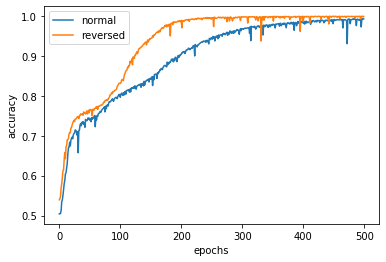

In [6]:
import matplotlib.pyplot as plt

normal_model_accuracy = normal_result.history['val_accuracy']
reversed_model_accuracy = reversed_result.history['val_accuracy']
x_len = min(len(normal_model_accuracy), len(reversed_model_accuracy))
epochs = range(x_len)

plt.plot(epochs, normal_model_accuracy, linestyle = '-',  label = 'normal')
plt.plot(epochs,reversed_model_accuracy, linestyle = '-',  label = 'reversed')
plt.legend(loc="upper left")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()